In [24]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
from tqdm.notebook import tqdm
load_dotenv()

True

In [2]:
cred_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager = cred_manager)

In [3]:
artists = pd.read_csv('sample_artists_2010.csv')

In [4]:
artist_list = artists['artists']

In [5]:
n = artist_list.shape[0]
artist_dict = {artist: i for i, artist in enumerate(artist_list)}
adj_matrix = np.zeros((n, n))

In [25]:
# PROTOTYPE
for i, artist in tqdm(enumerate(artist_list)):
    search = sp.search(q = f'artist:{artist}', type = 'artist')['artists']['items'][0]
    artist_id = search['uri']
    albums = sp.artist_albums(artist_id, album_type = 'album', limit = 50)['items']
    dates = [album['release_date'] for album in albums]
    for j, date in reversed(list(enumerate(dates))):
        year = int(date[0:4])
        if year < 2008 or year > 2012:
            del albums[j]
    albums = [album['uri'] for album in albums]
    for album in albums:
        tracks = sp.album_tracks(album)['items']
        song_artists = [track['artists'] for track in tracks]
        for song_artist_list in song_artists:
            for song_artist in song_artist_list:
                name = song_artist['name']
                if name != artist:
                    try:
                        index = artist_dict[name]
                        # print(artist, name, i, index)
                        adj_matrix[i, index] = 1
                        adj_matrix[index, i] = 1
                    except:
                        pass

0it [00:00, ?it/s]

In [7]:
adj_matrix

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 0.]])

In [8]:
import networkx as nx
G = nx.Graph(adj_matrix)
label_dict = {val: key for key, val in artist_dict.items()}

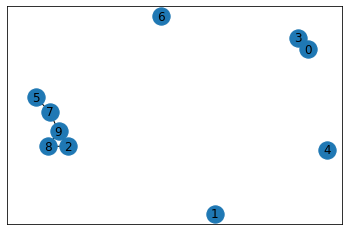

In [19]:
pos = nx.circular_layout(G)
nx.draw_networkx(G)#, labels = label_dict)
plt.draw()

In [21]:
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.08333333333333333,
 8: 0.0,
 9: 0.1111111111111111}

In [20]:
label_dict

{0: 'Lady Gaga',
 1: 'Taylor Swift',
 2: 'Eminem',
 3: 'Lady A',
 4: 'Kesha',
 5: 'Usher',
 6: 'The Black Eyed Peas',
 7: 'Justin Bieber',
 8: 'Rihanna',
 9: 'Drake'}

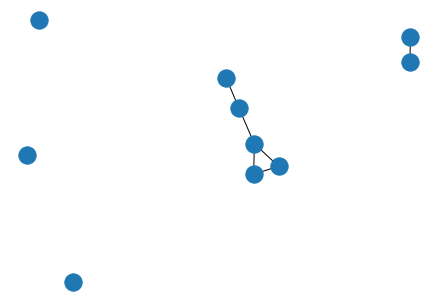

In [16]:
nx.draw(G)

In [7]:
song_artists

[[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5pKCCKE2ajJHZ9KAiaK11H'},
   'href': 'https://api.spotify.com/v1/artists/5pKCCKE2ajJHZ9KAiaK11H',
   'id': '5pKCCKE2ajJHZ9KAiaK11H',
   'name': 'Rihanna',
   'type': 'artist',
   'uri': 'spotify:artist:5pKCCKE2ajJHZ9KAiaK11H'}],
 [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5pKCCKE2ajJHZ9KAiaK11H'},
   'href': 'https://api.spotify.com/v1/artists/5pKCCKE2ajJHZ9KAiaK11H',
   'id': '5pKCCKE2ajJHZ9KAiaK11H',
   'name': 'Rihanna',
   'type': 'artist',
   'uri': 'spotify:artist:5pKCCKE2ajJHZ9KAiaK11H'}],
 [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5pKCCKE2ajJHZ9KAiaK11H'},
   'href': 'https://api.spotify.com/v1/artists/5pKCCKE2ajJHZ9KAiaK11H',
   'id': '5pKCCKE2ajJHZ9KAiaK11H',
   'name': 'Rihanna',
   'type': 'artist',
   'uri': 'spotify:artist:5pKCCKE2ajJHZ9KAiaK11H'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/7CajNmpbOovFoOoasH2HaY'},
   'href': 'https://api.spot

In [7]:
song_artist

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6LqNN22kT3074XbTVUrhzX'},
  'href': 'https://api.spotify.com/v1/artists/6LqNN22kT3074XbTVUrhzX',
  'id': '6LqNN22kT3074XbTVUrhzX',
  'name': 'Kesha',
  'type': 'artist',
  'uri': 'spotify:artist:6LqNN22kT3074XbTVUrhzX'}]

In [9]:
search = sp.search(q = 'artist:The Weeknd', type = 'artist')
query = search['artists']['items'][0]
name, uri = (query['name'], query['uri'])
albums = sp.artist_albums(uri, album_type = 'album')

In [14]:
int(albums['items'][0]['release_date'][0:4])

2022

In [33]:
items = albums['items']
uris = [item['uri'] for item in items]
tracks = []
names = []
for uri in uris:
    album_tracks = sp.album_tracks(uri)['items']
    tracks = tracks + album_tracks
    album_names = [item['name'] for item in album_tracks]
    names = names + album_names
    
remove = []
already_seen = []
for i in range(len(names)):
    name = names[i]
    if name not in already_seen:
        already_seen.append(name)
    else:
        remove.append(i)

In [38]:
for i in sorted(remove, reverse = True):
    del tracks[i]
    del names[i]

In [43]:
tracks[7]

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
   'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
   'id': '1Xyo4u8uXC1ZmMpatF05PJ',
   'name': 'The Weeknd',
   'type': 'artist',
   'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/4V8LLVI7PbaPR0K2TGSxFF'},
   'href': 'https://api.spotify.com/v1/artists/4V8LLVI7PbaPR0K2TGSxFF',
   'id': '4V8LLVI7PbaPR0K2TGSxFF',
   'name': 'Tyler, The Creator',
   'type': 'artist',
   'uri': 'spotify:artist:4V8LLVI7PbaPR0K2TGSxFF'}],
 'available_markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',